## 10.Pima Indian Diabetes2
### - Step by Step Diabetes Classification-KNN-detailed

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right\"> Initial upload: 2022.02.22 </div>
<div style="text-align: right\"> Last update: 2022.02.22</div>

- 출처 : https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [4]:
from mlxtend.plotting import plot_decision_regions

In [5]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

### Basic data science and ML Pipeline
- 참고 : https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/

OSEMN Pipeline
- O - Obtaining our data
- S - Scrubbing / Cleaning our data
- E - Exploring / Visualizing our data will allow us to find patterns and trends
- M - Modeling our data will give us our predictive power as a wizard
- N - INterpreting our data

In [4]:
import os
print(os.listdir('data/diabetes'))

['diabetes.csv']


데이터 설명  
북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터입니다.  
보통 당뇨 원인으로 식습관과 유전을 꼽습니다.  
피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 
20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자가 생겨났습니다.  
고립된 유전적 특성 때문에 당뇨학회에서는 피마 인디언의 당뇨병 자료에 대해 많은 연구를 했습니다.

**컬럼 정보**  
1. Number of times pregnant  

2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test  

3. Diastolic blood pressure (mm Hg)  

4. Triceps skin fold thickness (mm)  

5. 2-Hour serum insulin (mu U/ml)  

6. Body mass index (weight in kg/(height in m)^2)  

7. Diabetes pedigree function  

8. Age (years)  

9. Class variable (0 or 1)  

In [6]:
df = pd.read_csv('data/diabetes/diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.shape

(768, 9)

### Basic EDA and statistical analysis

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- 카테고리 데이터 없다. 인코딩 필요없음

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수 (체중(kg) / 키(m)^2)
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값 (0 또는 1)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### 이 요약에서 나오는 질문(The Question creeping out of this summary)

위 컬럼의 최소 값이 0이 될 수 있을 까?  
혈당이나 혈압 등은 측정치가 0이라는 것이 말이 안된다.  
따라서 결측치일 가능성이 높다.  

특히 다음 컬럼을 유심히 살펴보자.  
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

일단 이 0 값들을 np.nan을 설정해두자. 어떤 값을 넣을지는 추후에 결정하자.

In [11]:
df_copy = df.copy(deep = True)

df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
                                df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

이제 이 0 values에 어떤 값을 넣을지 검토하기 위해 분포를 확인해 보자.

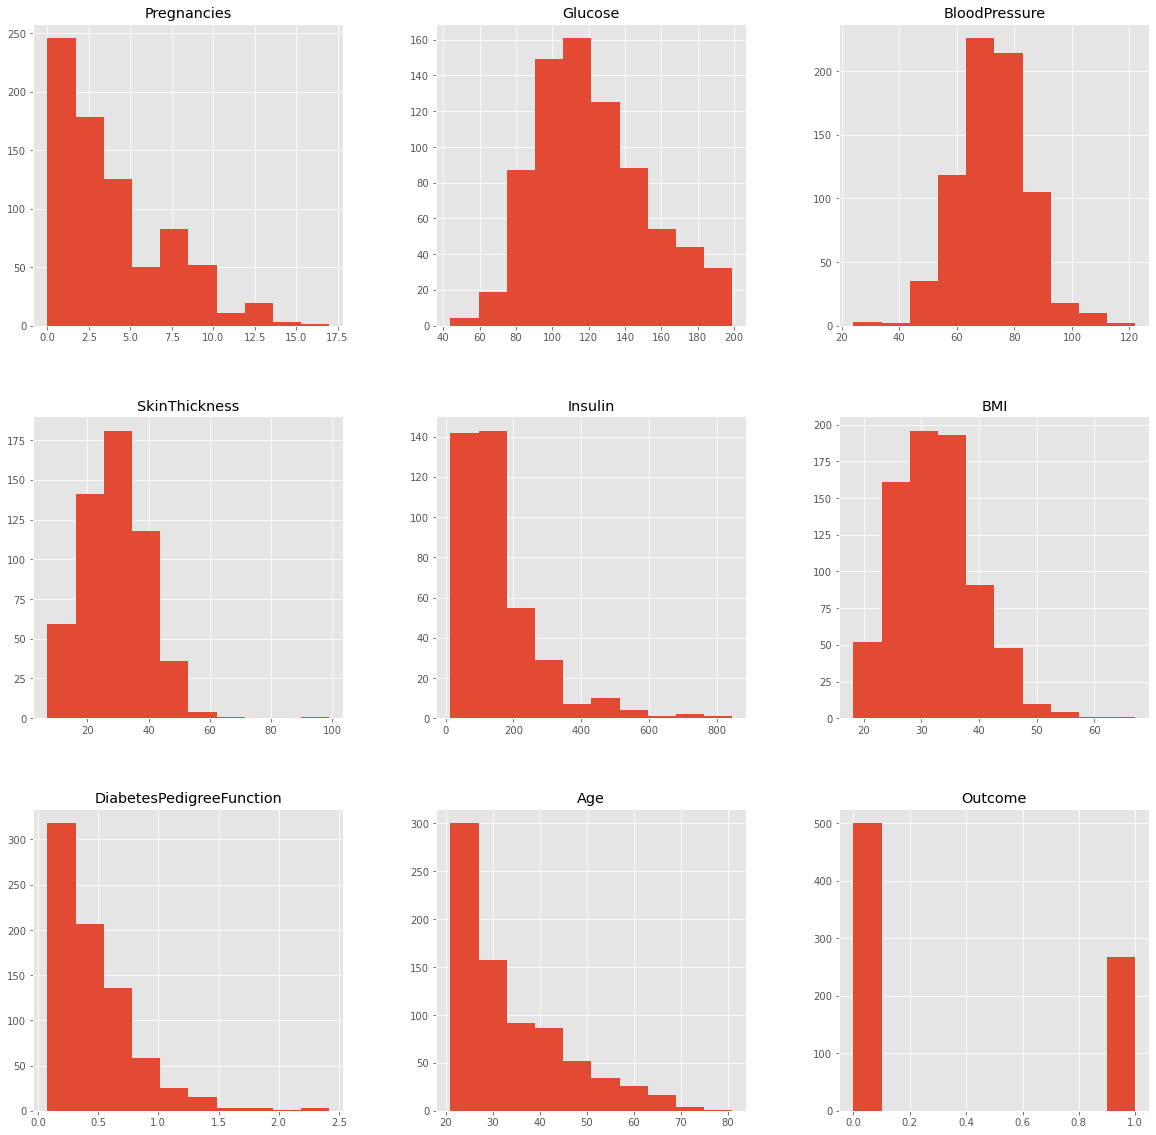

In [14]:
df_copy.hist(figsize=(20, 20))
plt.show()

데이터의 분포에 따라 결측치에 값을 입력해보자. 평균 값...

In [16]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in zero_features:
    df_copy[feature] = df_copy[feature].fillna(df_copy[feature].mean())

In [17]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

결측치 처리 후 분포 확인

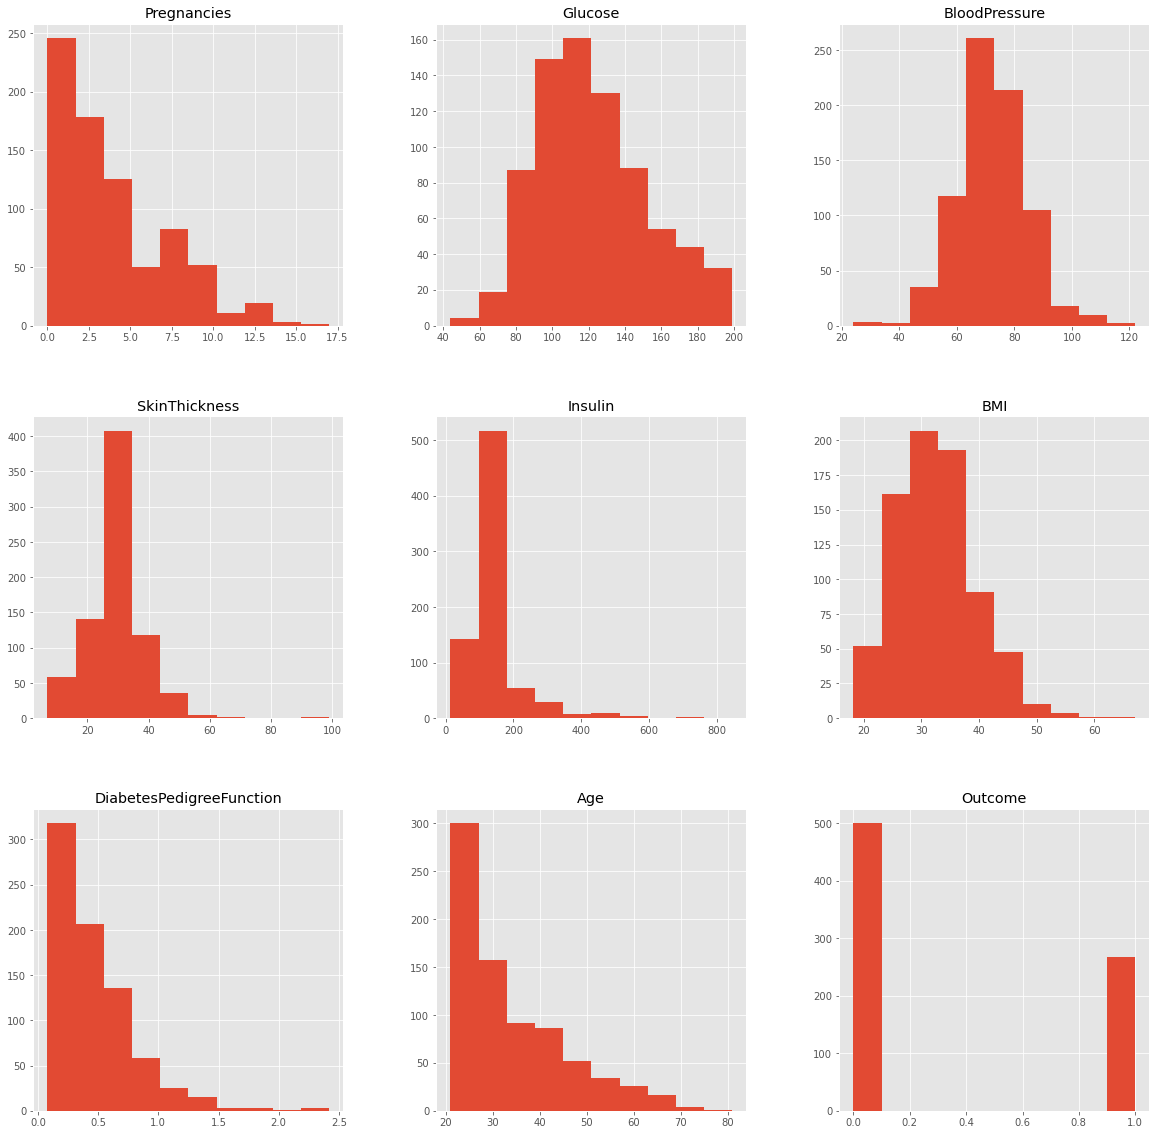

In [18]:
df_copy.hist(figsize=(20, 20))
plt.show()

#### Skewness

- left-skewed distribution : 왼쪽으로 꼬리가 길게 분포. negatively skewed distribution이라고도 함. 반대 방향이라서.. 평균이 피크의 왼쪽에 위치  
- right-skewed distribution : 평균이 피크의 오른쪽에 위치

???

타겟 분포

In [19]:
df_copy['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

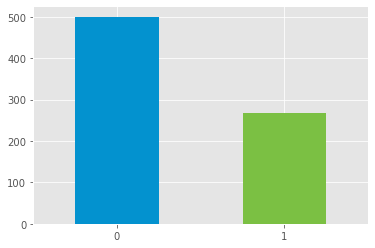

In [22]:
colors = ["#0392cf", "#7bc043"]

df_copy['Outcome'].value_counts().plot(kind='bar', color= colors, rot=0)

pair plot

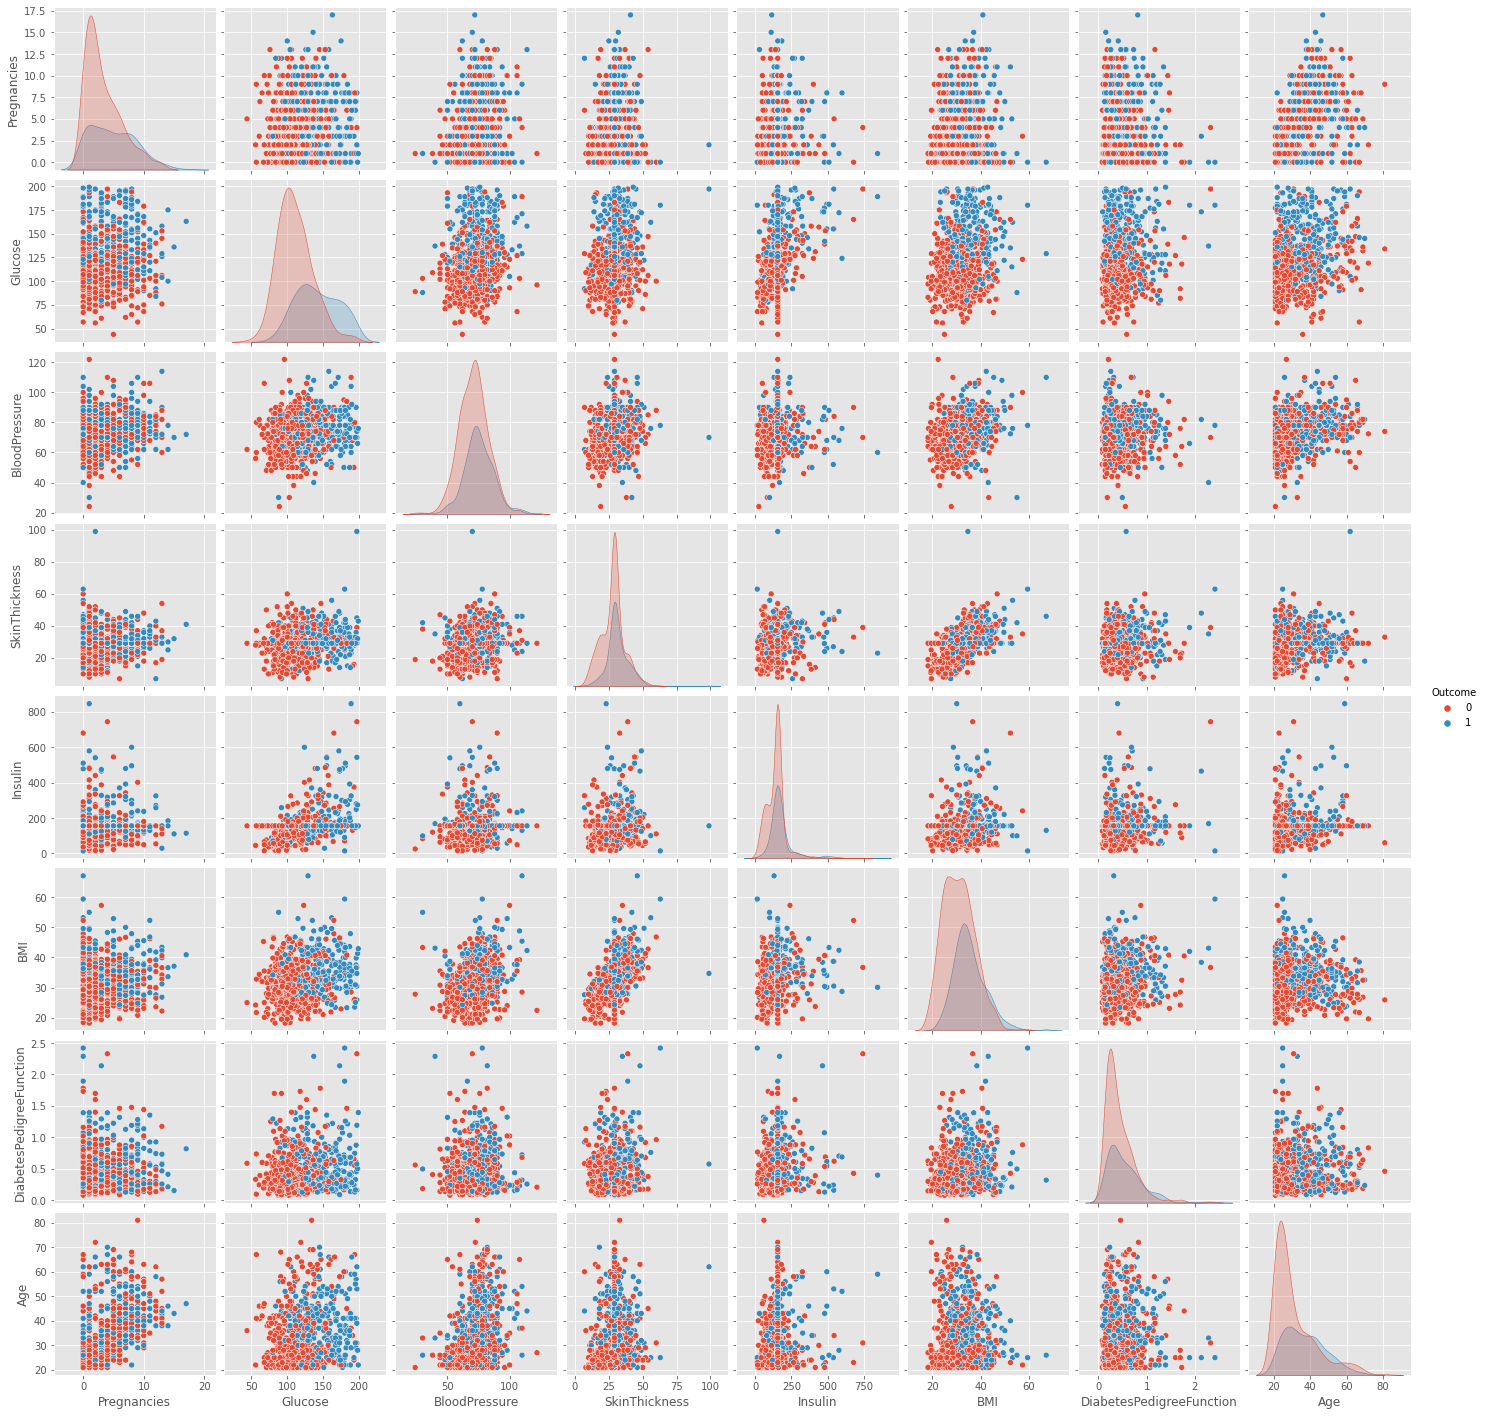

In [24]:
sns.pairplot(data=df_copy, hue='Outcome')

피어슨 상관도

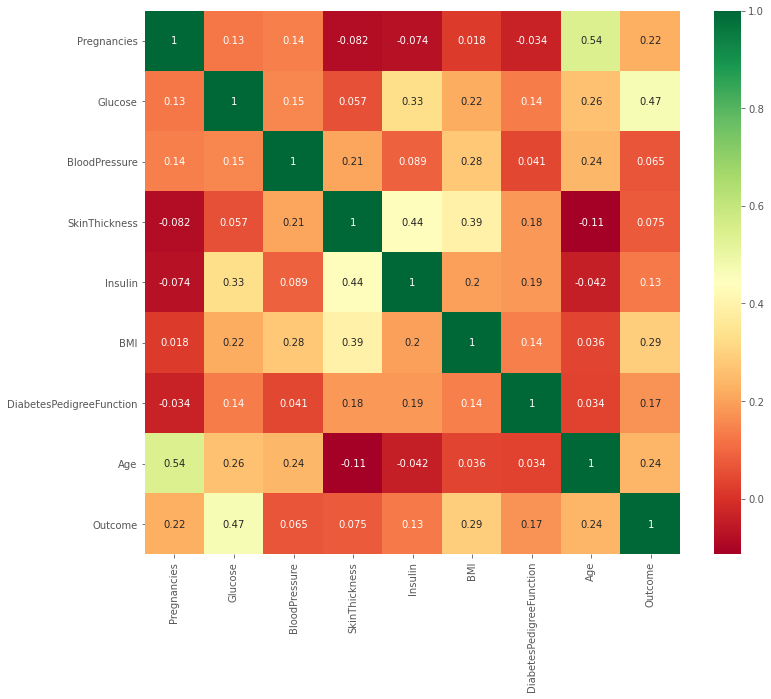

In [26]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

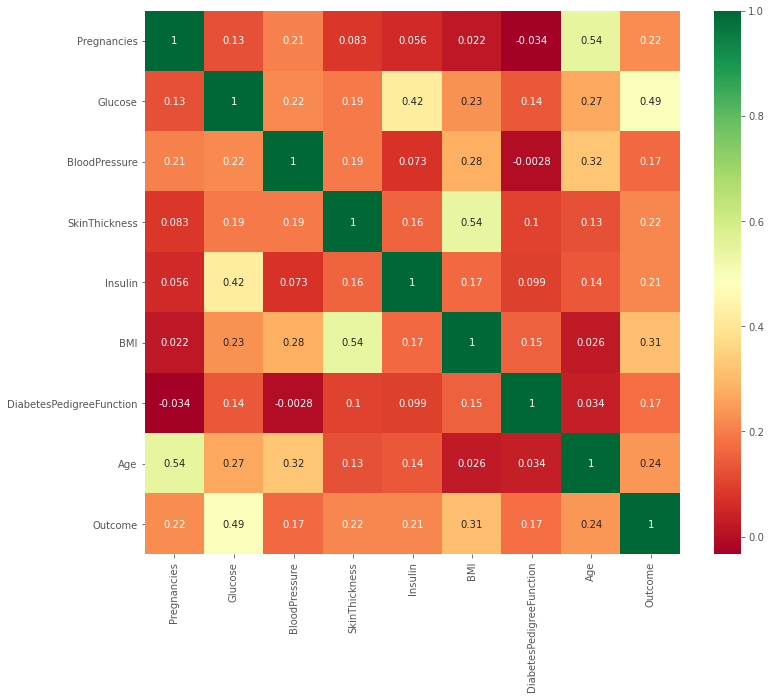

In [27]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df_copy.corr(), annot=True,cmap ='RdYlGn')

#### Scaling the data

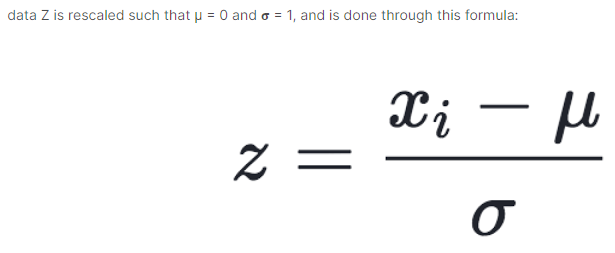

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [31]:
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [33]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [34]:
y = df_copy['Outcome']

**KNN을 위해 스케일링이 필요한 이유 : 유클리디안 디스턴스를 사용하기 때문이다.**

**Cross Validation:** When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

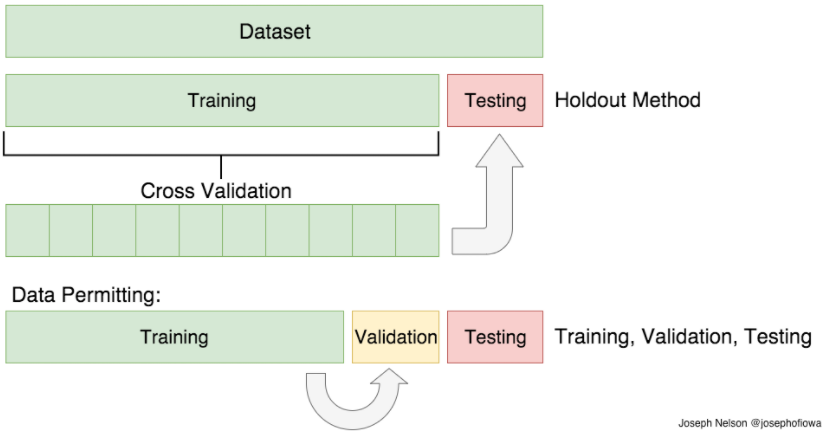

In [35]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
test_scores = []
train_scores = []

In [38]:
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [39]:
train_scores

[1.0,
 0.84765625,
 0.865234375,
 0.83203125,
 0.8359375,
 0.806640625,
 0.81640625,
 0.8046875,
 0.802734375,
 0.79296875,
 0.80859375,
 0.794921875,
 0.796875,
 0.79296875]

In [40]:
test_scores

[0.7265625,
 0.73046875,
 0.75390625,
 0.74609375,
 0.734375,
 0.7265625,
 0.74609375,
 0.73046875,
 0.73046875,
 0.72265625,
 0.76171875,
 0.7265625,
 0.75390625,
 0.73828125]

max score 찾기

In [41]:
max_train_score = max(train_scores)

In [42]:
max_train_score

1.0

In [43]:
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [44]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.171875 % and k = [11]


결과 시각화

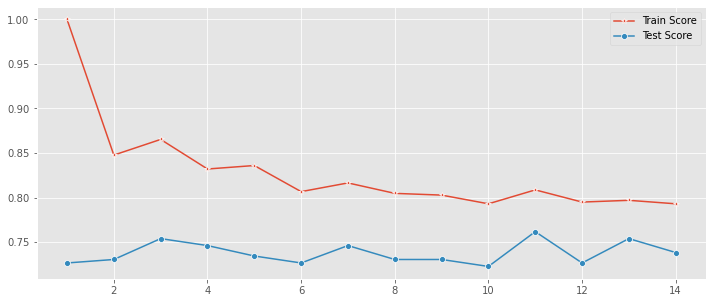

In [46]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

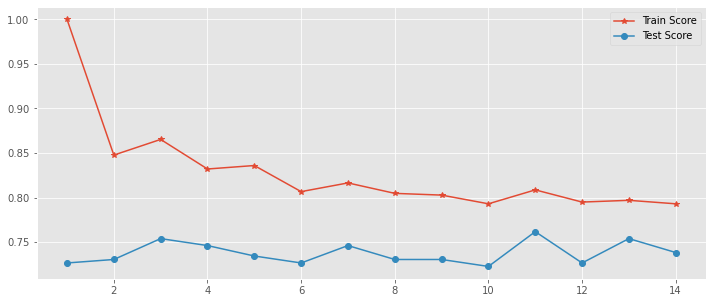

In [50]:
fig, ax = plt.subplots(figsize=(12, 5))

ax= plt.plot(range(1, 15), train_scores,marker='*',label='Train Score')
ax= plt.plot(range(1, 15), test_scores,marker='o',label='Test Score')
plt.legend()

- 가장 좋은 일반화 성능은 k=11일 때 이다. 따라서 11을 최종 모델로 사용하기로 한다.

In [51]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76171875

Decision boundary를 그려보자.

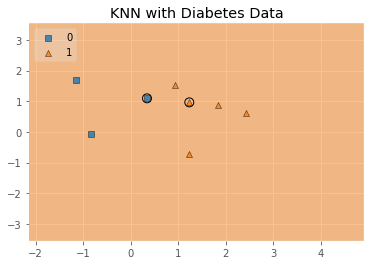

In [52]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

-????

In [56]:
knn = KNeighborsClassifier(11)

knn.fit(X_train[['Glucose', 'BloodPressure']],y_train)

KNeighborsClassifier(n_neighbors=11)

<AxesSubplot:>

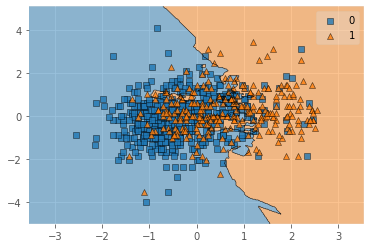

In [57]:
plot_decision_regions(X=X[['Glucose', 'BloodPressure']].values, y=y.values,
                      clf=knn)

### Model Performance Analysis

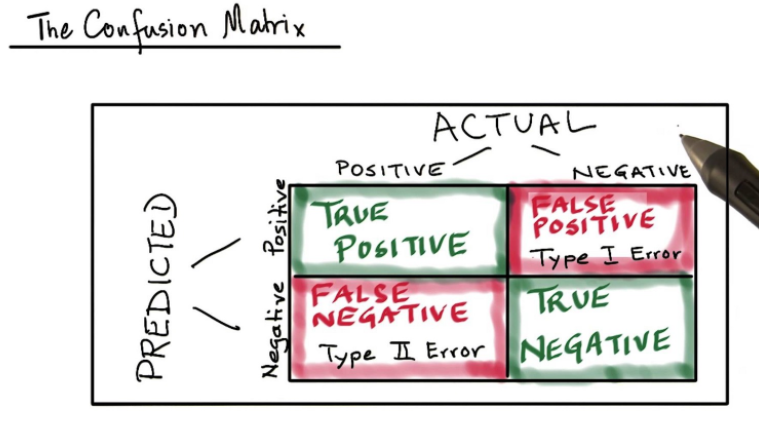

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76171875

In [60]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,143,24,167
1,37,52,89
All,180,76,256


Text(0.5, 15.0, 'Predicted label')

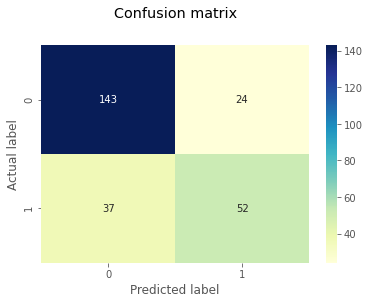

In [63]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Classification Report

    TP – True Positives  
    FP – False Positives  

    Precision – Accuracy of positive predictions.  
    Precision = TP/(TP + FP)  

    FN – False Negatives  

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.  
    Recall = TP/(TP+FN)  

    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.  
    F1 Score takes into account precision and the recall.   
    It is created by finding the the harmonic mean of precision and recall.  

    F1 = 2 x (precision x recall)/(precision + recall)  

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

In [66]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       167
           1       0.68      0.58      0.63        89

    accuracy                           0.76       256
   macro avg       0.74      0.72      0.73       256
weighted avg       0.76      0.76      0.76       256



#### ROC-AUC

In [67]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

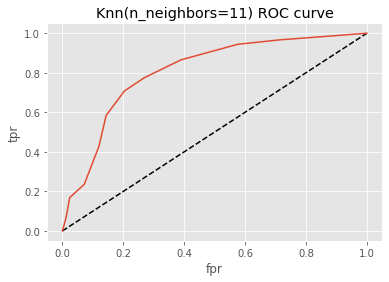

In [68]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [69]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8072730942609163

#### 하이퍼 파라미터 최적화

In [70]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7748068924539513
Best Parameters: {'n_neighbors': 25}
